In [2]:
import numpy as np 
from scipy.integrate import odeint
import os, sys, warnings
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate1 as sr1
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')

**Q0: How does the mean squared error $\xi$ depend on $D_r$?**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


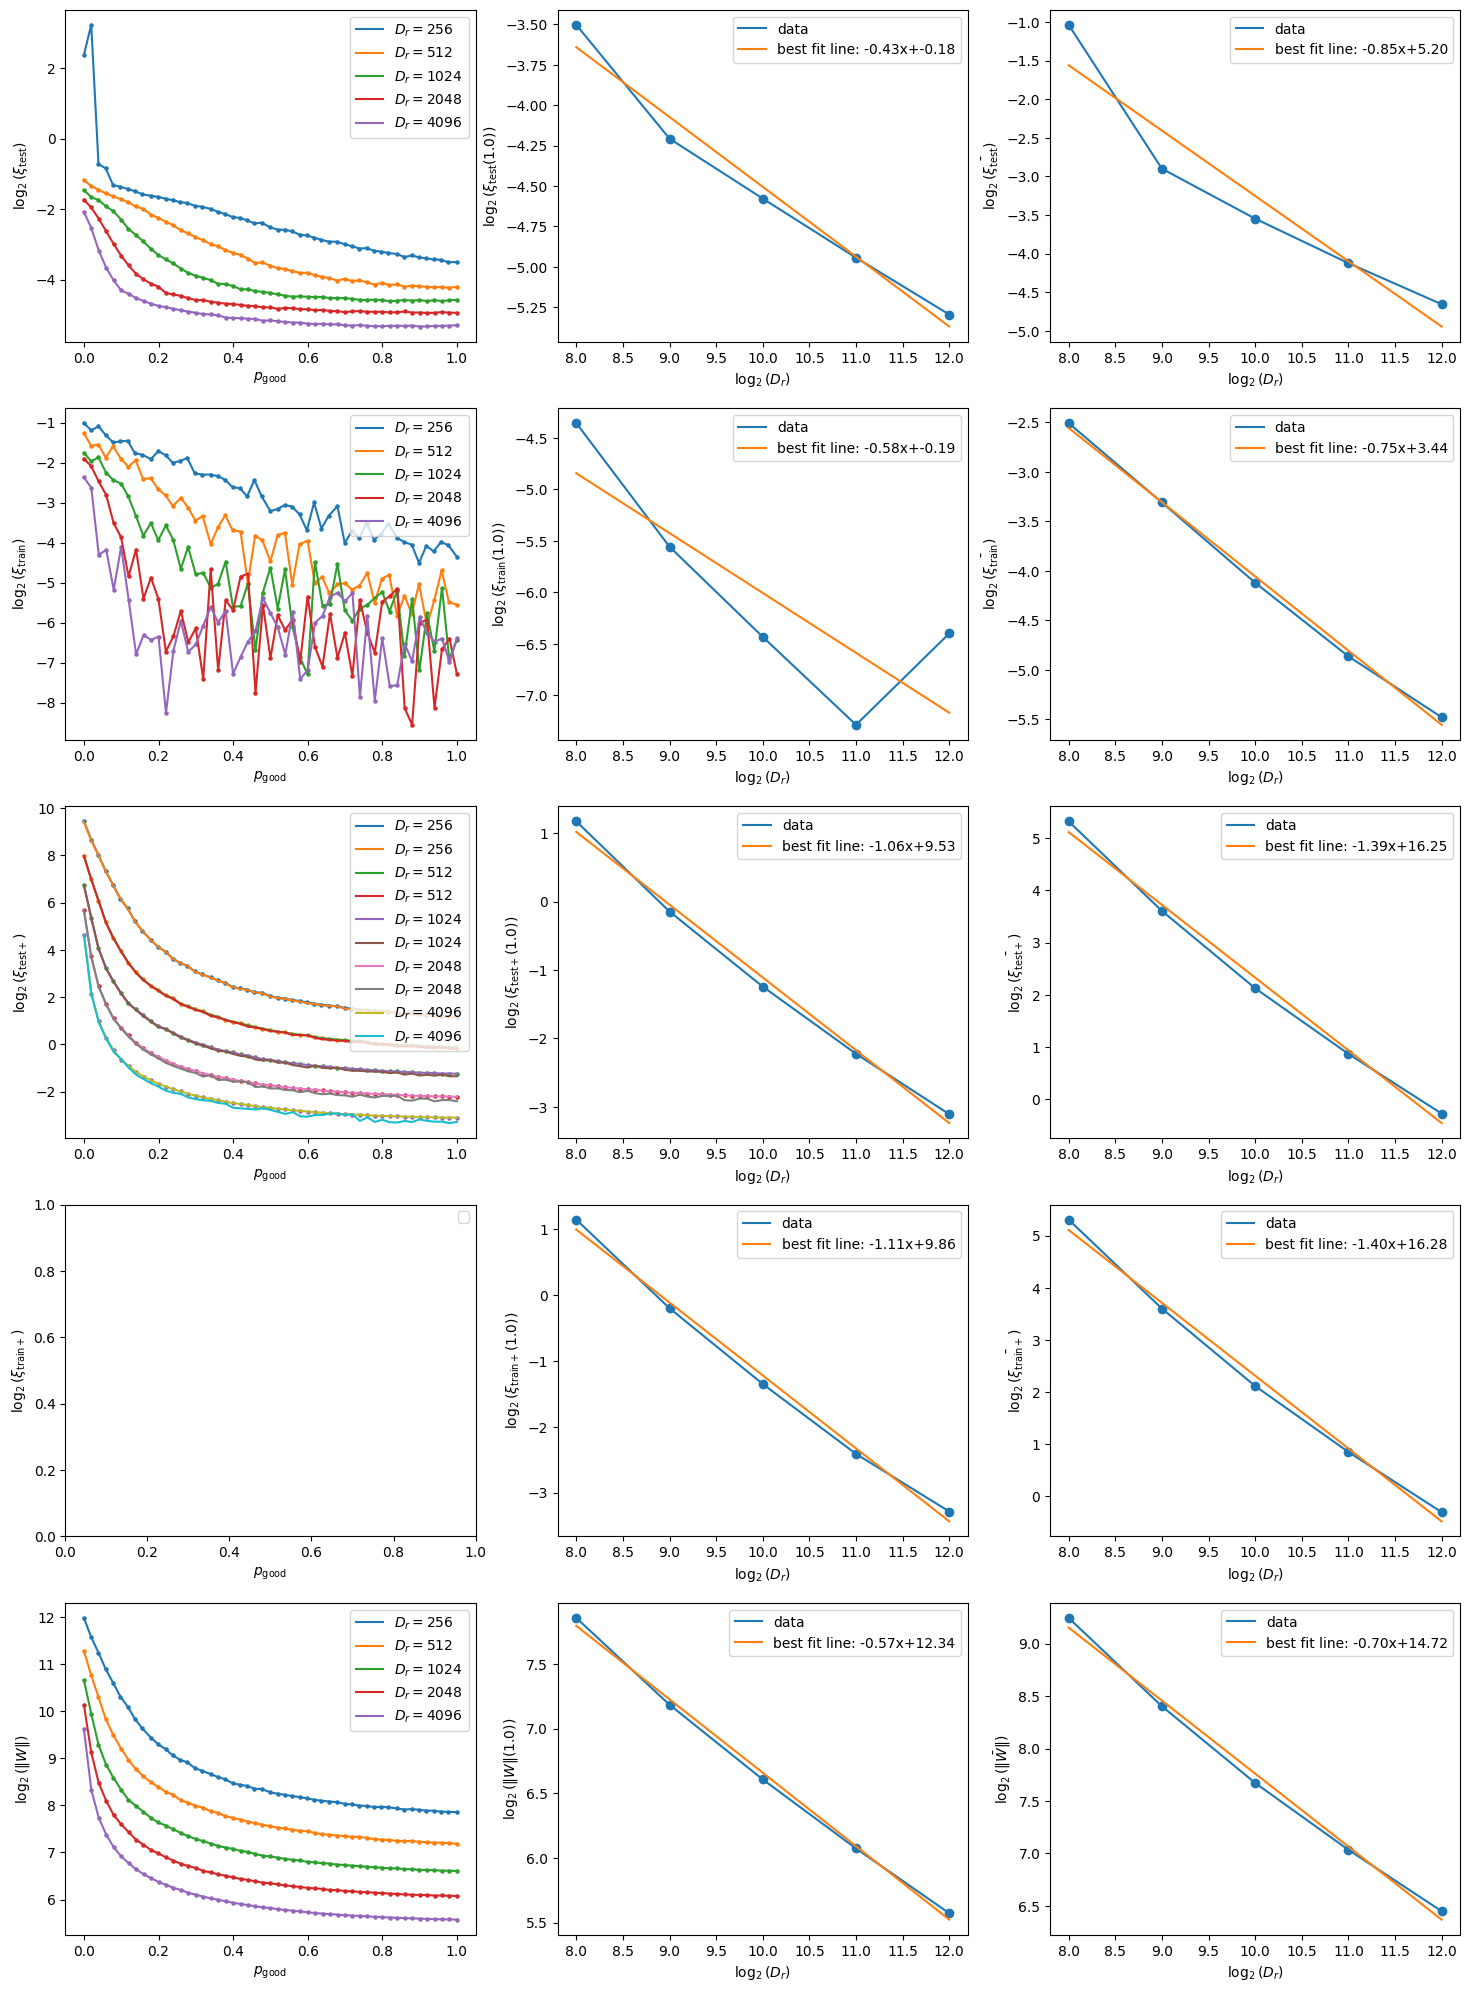

In [3]:
fig = plt.figure(figsize=(18, 25))
ax1 = fig.add_subplot(531)
ax2 = fig.add_subplot(532)
ax3 = fig.add_subplot(533)

ax4 = fig.add_subplot(534)
ax5 = fig.add_subplot(535)
ax6 = fig.add_subplot(536)


ax7 = fig.add_subplot(537)
ax8 = fig.add_subplot(538)
ax9 = fig.add_subplot(539)

ax10 = fig.add_subplot(5,3,10)
ax11 = fig.add_subplot(5,3,11)
ax12 = fig.add_subplot(5,3,12)


ax13 = fig.add_subplot(5,3,13)
ax14 = fig.add_subplot(5,3,14)
ax15 = fig.add_subplot(5,3,15)

all_D_r = [2**n for n in [8, 9, 10, 11, 12]]
err_at_idx_test = []
mean_err_test = []
err_at_idx_train = []
mean_err_train = []
err_at_idx_test_beta = []
mean_err_test_beta = []
err_at_idx_train_beta = []
mean_err_train_beta = []

W_at_idx = []
mean_W = []

index = 50
midx = 0
save_folder = '../data/L63-Strategy-varying-featuresize/'

for i, D_r in enumerate(all_D_r):
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D_r))
    mse = bsa.get_line('mean_sq_err')[0]
    ax1.plot(bsa.percents, np.log2(mse), label=fr'$D_r=${D_r}')
    ax1.scatter(bsa.percents, np.log2(mse), s=5)
    err_at_idx_test.append(mse[index])
    mean_err_test.append(mse[midx:].mean())


    mse = bsa.get_line('train_sq_err')[0]
    ax4.plot(bsa.percents, np.log2(mse), label=fr'$D_r=${D_r}')
    ax4.scatter(bsa.percents, np.log2(mse), s=5)
    err_at_idx_train.append(mse[index])
    mean_err_train.append(mse[midx:].mean())

    mse = bsa.get_line('mean_sq_err_penalty')[0]
    ax7.plot(bsa.percents, np.log2(mse), label=fr'$D_r=${D_r}')
    ax7.scatter(bsa.percents, np.log2(mse), s=5)
    err_at_idx_test_beta.append(mse[index])
    mean_err_test_beta.append(mse[midx:].mean())

    mse = bsa.get_line('train_sq_err_penalty')[0]
    ax7.plot(bsa.percents, np.log2(mse), label=fr'$D_r=${D_r}', linestyle='-')
    # ax10.scatter(bsa.percents, np.log2(mse), s=5)
    err_at_idx_train_beta.append(mse[index])
    mean_err_train_beta.append(mse[midx:].mean())

    mse = bsa.get_line('||W||')[0] * D_r
    ax13.plot(bsa.percents, np.log2(mse), label=fr'$D_r=${D_r}')
    ax13.scatter(bsa.percents, np.log2(mse), s=5)
    W_at_idx.append(mse[index])
    mean_W.append(mse[midx:].mean())

ax1.set_xlabel(r'$p_{\rm good}$')
ax1.set_ylabel(r'$\log_2(\xi_{\rm test})$')
ax1.legend()

y = np.log2(err_at_idx_test)
x = np.log2(all_D_r)
lr = stats.linregress(x, y)
a, b = lr.slope, lr.intercept
ax2.plot(x, y, label=r'data')
ax2.scatter(x, y)
ax2.plot(x, a*x+b, label=fr'best fit line: {a:.2f}x+{b:.2f}')
ax2.set_xlabel(r'$\log_2(D_r)$')
ax2.set_ylabel(r'$\log_2(\xi_{\rm test}$'+f'({bsa.percents[index]:.1f}))')
ax2.legend()



y = np.log2(mean_err_test)
x = np.log2(all_D_r)
lr = stats.linregress(x, y)
a, b = lr.slope, lr.intercept
ax3.plot(x, y, label=r'data')
ax3.scatter(x, y)
ax3.plot(x, a*x+b, label=fr'best fit line: {a:.2f}x+{b:.2f}')
ax3.set_xlabel(r'$\log_2(D_r)$')
ax3.set_ylabel(r'$\log_2(\bar{\xi_{\rm test}})$')
ax3.legend()




ax4.set_xlabel(r'$p_{\rm good}$')
ax4.set_ylabel(r'$\log_2(\xi_{\rm train})$')
ax4.legend()

y = np.log2(err_at_idx_train)
x = np.log2(all_D_r)
lr = stats.linregress(x, y)
a, b = lr.slope, lr.intercept
ax5.plot(x, y, label=r'data')
ax5.scatter(x, y)
ax5.plot(x, a*x+b, label=fr'best fit line: {a:.2f}x+{b:.2f}')
ax5.set_xlabel(r'$\log_2(D_r)$')
ax5.set_ylabel(r'$\log_2(\xi_{\rm train}$'+f'({bsa.percents[index]:.1f}))')
ax5.legend()



y = np.log2(mean_err_train)
x = np.log2(all_D_r)
lr = stats.linregress(x, y)
a, b = lr.slope, lr.intercept
ax6.plot(x, y, label=r'data')
ax6.scatter(x, y)
ax6.plot(x, a*x+b, label=fr'best fit line: {a:.2f}x+{b:.2f}')
ax6.set_xlabel(r'$\log_2(D_r)$')
ax6.set_ylabel(r'$\log_2(\bar{\xi_{\rm train}})$')
ax6.legend()


ax7.set_xlabel(r'$p_{\rm good}$')
ax7.set_ylabel(r'$\log_2(\xi_{\rm test+})$')
ax7.legend()

y = np.log2(err_at_idx_test_beta)
x = np.log2(all_D_r)
lr = stats.linregress(x, y)
a, b = lr.slope, lr.intercept
ax8.plot(x, y, label=r'data')
ax8.scatter(x, y)
ax8.plot(x, a*x+b, label=fr'best fit line: {a:.2f}x+{b:.2f}')
ax8.set_xlabel(r'$\log_2(D_r)$')
ax8.set_ylabel(r'$\log_2(\xi_{\rm test+}$'+f'({bsa.percents[index]:.1f}))')
ax8.legend()



y = np.log2(mean_err_test_beta)
x = np.log2(all_D_r)
lr = stats.linregress(x, y)
a, b = lr.slope, lr.intercept
ax9.plot(x, y, label=r'data')
ax9.scatter(x, y)
ax9.plot(x, a*x+b, label=fr'best fit line: {a:.2f}x+{b:.2f}')
ax9.set_xlabel(r'$\log_2(D_r)$')
ax9.set_ylabel(r'$\log_2(\bar{\xi_{\rm test+}})$')
ax9.legend()



ax10.set_xlabel(r'$p_{\rm good}$')
ax10.set_ylabel(r'$\log_2(\xi_{\rm train+})$')
ax10.legend()

y = np.log2(err_at_idx_train_beta)
x = np.log2(all_D_r)
lr = stats.linregress(x, y)
a, b = lr.slope, lr.intercept
ax11.plot(x, y, label=r'data')
ax11.scatter(x, y)
ax11.plot(x, a*x+b, label=fr'best fit line: {a:.2f}x+{b:.2f}')
ax11.set_xlabel(r'$\log_2(D_r)$')
ax11.set_ylabel(r'$\log_2(\xi_{\rm train+}$'+f'({bsa.percents[index]:.1f}))')
ax11.legend()



y = np.log2(mean_err_train_beta)
x = np.log2(all_D_r)
lr = stats.linregress(x, y)
a, b = lr.slope, lr.intercept
ax12.plot(x, y, label=r'data')
ax12.scatter(x, y)
ax12.plot(x, a*x+b, label=fr'best fit line: {a:.2f}x+{b:.2f}')
ax12.set_xlabel(r'$\log_2(D_r)$')
ax12.set_ylabel(r'$\log_2(\bar{\xi_{\rm train+}})$')
ax12.legend()


ax13.set_xlabel(r'$p_{\rm good}$')
ax13.set_ylabel(r'$\log_2(\|W\|)$')
ax13.legend()

y = np.log2(W_at_idx)
x = np.log2(all_D_r)
lr = stats.linregress(x, y)
a, b = lr.slope, lr.intercept
ax14.plot(x, y, label=r'data')
ax14.scatter(x, y)
ax14.plot(x, a*x+b, label=fr'best fit line: {a:.2f}x+{b:.2f}')
ax14.set_xlabel(r'$\log_2(D_r)$')
ax14.set_ylabel(r'$\log_2(\|W\|$'+f'({bsa.percents[index]:.1f}))')
ax14.legend()



y = np.log2(mean_W)
x = np.log2(all_D_r)
lr = stats.linregress(x, y)
a, b = lr.slope, lr.intercept
ax15.plot(x, y, label=r'data')
ax15.scatter(x, y)
ax15.plot(x, a*x+b, label=fr'best fit line: {a:.2f}x+{b:.2f}')
ax15.set_xlabel(r'$\log_2(D_r)$')
ax15.set_ylabel(r'$\log_2(\bar{\|W\|})$')
ax15.legend()

# plt.savefig(f'../data/plots/error.png')

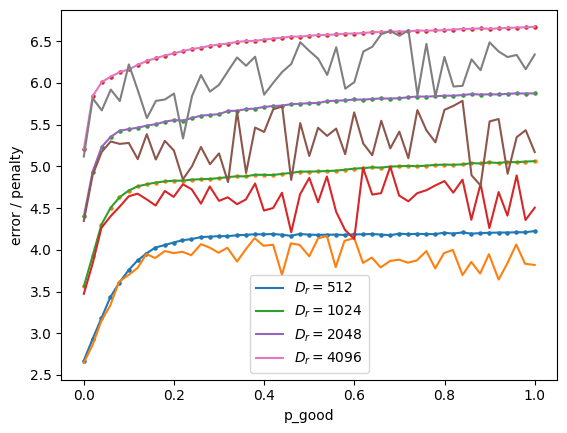

In [4]:
for i, D_r in enumerate(all_D_r):
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D_r))
    a = bsa.get_line('mean_sq_err')[0]
    d = bsa.get_line('train_sq_err')[0]
    b = bsa.beta * bsa.get_line('||W||')[0]**2
    c = a/b
    f = d/b
    plt.plot(bsa.percents, np.log10(c), label=fr'$D_r=${D_r}')
    plt.scatter(bsa.percents, np.log10(c), s=5)
    plt.plot(bsa.percents, np.log10(f), linestyle='-')
    err_at_idx_test.append(mse[index])
    mean_err_test.append(mse[midx:].mean())


plt.ylabel(r'error / penalty')
plt.xlabel(r'p_good')
plt.legend()
plt.savefig('../data/plots/ratio_error_penalty.png')

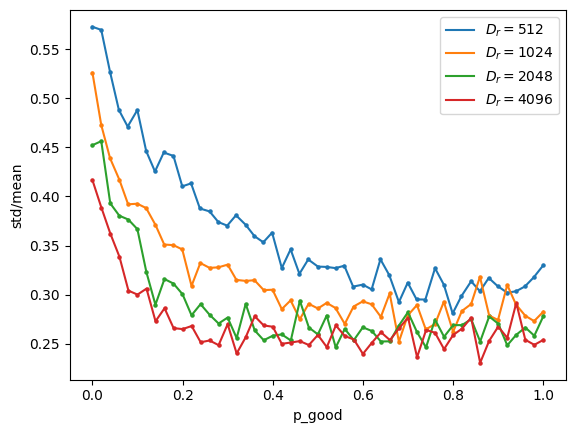

In [5]:
for i, D_r in enumerate(all_D_r):
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D_r))
    a, b = bsa.get_line('tau_f_se')
    # d = bsa.get_line('train_sq_err')[0]
    # b = bsa.beta * bsa.get_line('||W||')[0]**2
    # c = a/b
    # f = d/b
    plt.plot(bsa.percents, b/a, label=fr'$D_r=${D_r}')
    plt.scatter(bsa.percents, b/a, s=5)
    # plt.plot(bsa.percents, np.log10(f), linestyle='-')
    err_at_idx_test.append(mse[index])
    mean_err_test.append(mse[midx:].mean())


plt.ylabel(r'std/mean')
plt.xlabel(r'p_good')
plt.legend()
plt.savefig('../data/plots/{ratio_tau_f}.png')

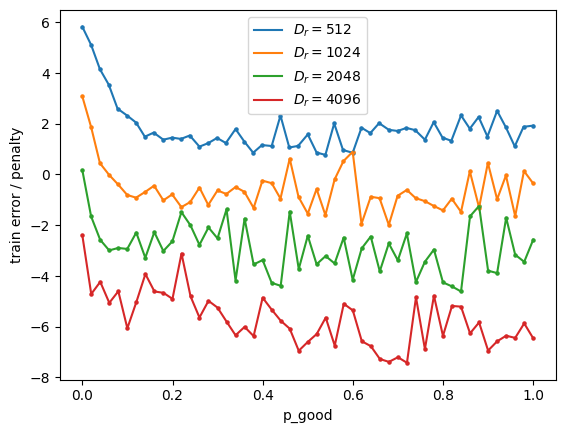

In [12]:
for i, D_r in enumerate(all_D_r):
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D_r))
    a = bsa.get_line('train_sq_err')[0]
    b = bsa.get_line('||W||')[0]**2
    c = b/a
    plt.plot(bsa.percents, np.log2(c), label=fr'$D_r=${D_r}')
    plt.scatter(bsa.percents, np.log2(c), s=5)
    err_at_idx_test.append(mse[index])
    mean_err_test.append(mse[midx:].mean())


plt.ylabel(r'train error / penalty')
plt.xlabel(r'p_good')
plt.legend()

**Q1: How does $p^*D_r$ change with $D_r$?**

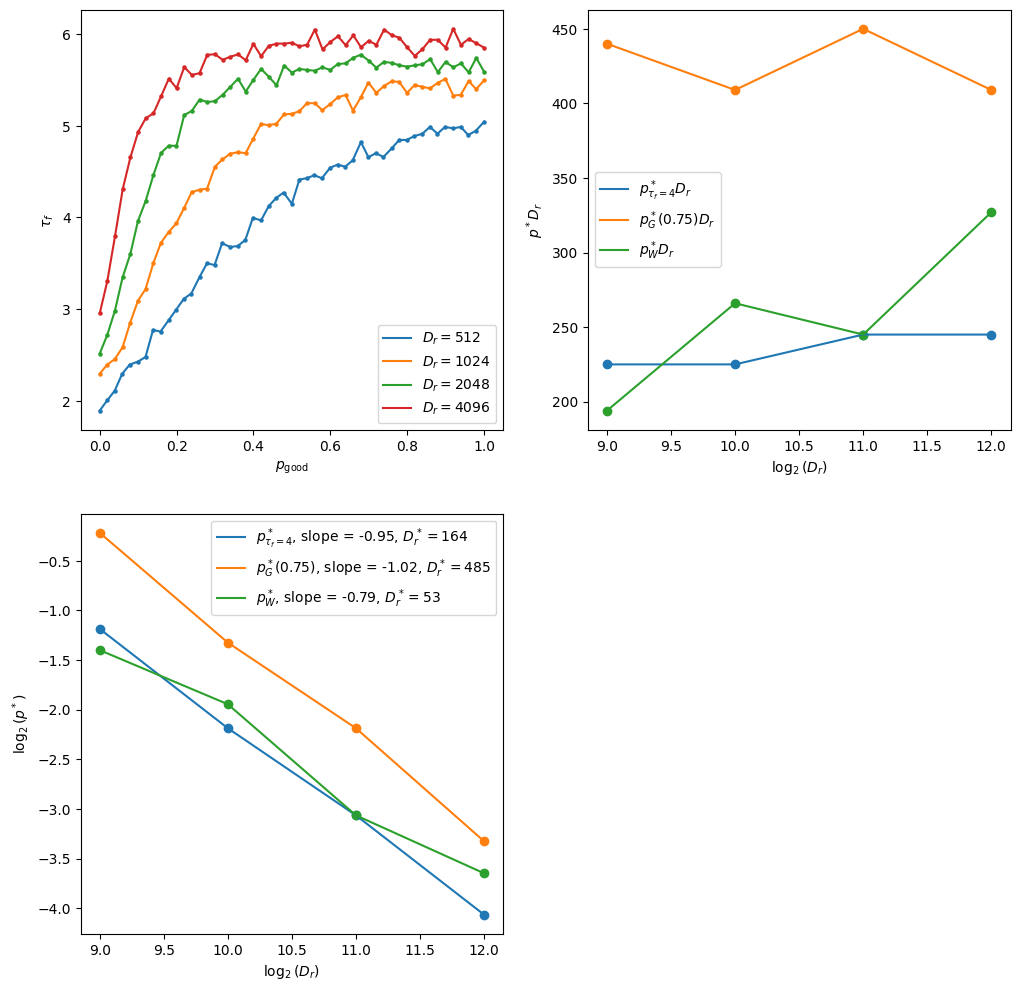

In [6]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
# ax4 = fig.add_subplot(224)

all_D_r = [2**n for n in [9, 10, 11, 12]]

p_star_t = []
p_star_G = []
p_star_W = []
idx_star = []
tau = 4
threshold = 0.75
spline = 0

def avg(arr):
    return np.cumsum(arr) / range(1, len(arr)+1)

def moving_avg(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

for i, D_r in enumerate(all_D_r):
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D_r))
    tau_f = bsa.get_line('tau_f_se', spline=spline)[0]
    # tau_f = moving_avg(tau_f)
    
    ax1.plot(bsa.percents, tau_f, label=fr'$D_r=${D_r}')
    ax1.scatter(bsa.percents, tau_f, s=5)
    j = np.argmax(tau_f > tau)
    idx_star.append(j)
    p_star_t.append(bsa.percents[j])
    p, q = bsa.compute_optimal_p(gen=tau, threshold=threshold, spline=spline)
    p_star_G.append(bsa.percents[p])
    p_star_W.append(bsa.percents[q])
    

p_star_t = np.array(p_star_t)
p_star_G = np.array(p_star_G)
p_star_W = np.array(p_star_W)
all_D_r = np.array(all_D_r)


# p_star_t = moving_avg(p_star_t, n=5)
# p_star_G = moving_avg(p_star_G, n=5)
# p_star_W = moving_avg(p_star_W, n=5)

ax1.set_xlabel(r'$p_{\rm good}$')
ax1.set_ylabel(r'$\tau_f$')
ax1.legend()


x = np.log2(all_D_r)

ax2.plot(np.log2(all_D_r), p_star_t*all_D_r, label=r'$p^*_{\tau_f=4}D_r$')
ax2.scatter(np.log2(all_D_r), p_star_t*all_D_r)
ax2.plot(np.log2(all_D_r), p_star_G*all_D_r, label=r'$p^*_G(0.75)D_r$')
ax2.scatter(np.log2(all_D_r), p_star_G*all_D_r)
ax2.plot(np.log2(all_D_r), p_star_W*all_D_r, label=r'$p^*_WD_r$')
ax2.scatter(np.log2(all_D_r), p_star_W*all_D_r)

ax2.set_xlabel(r'$\log_2(D_r)$')
ax2.set_ylabel(r'$p^*D_r$')
ax2.legend()

x = np.log2(all_D_r)
y = np.log2(p_star_t)
lr = stats.linregress(x, y)
D_r_star = int(2**lr.intercept) 


ax3.plot(np.log2(all_D_r), np.log2(p_star_t), label=r'$p^*_{\tau_f=4}$' + ', slope = {:.2f}, '.format(lr.slope) + r'$D_r^*=$' + f'{D_r_star}')
ax3.scatter(np.log2(all_D_r), np.log2(p_star_t))

y = np.log2(p_star_G)
lr = stats.linregress(x, y)
D_r_star = int(2**lr.intercept) 

ax3.plot(np.log2(all_D_r), np.log2(p_star_G), label=r'$p^*_G({:.2f})$, slope = {:.2f}, '.format(threshold, lr.slope) + r'$D_r^*=$' + f'{D_r_star}')
ax3.scatter(np.log2(all_D_r), np.log2(p_star_G))

y = np.log2(p_star_W)
lr = stats.linregress(x, y)
D_r_star = int(2**lr.intercept) 

ax3.plot(np.log2(all_D_r), np.log2(p_star_W), label=r'$p^*_W$, slope = {:.2f}, '.format(lr.slope) + r'$D_r^*=$' + f'{D_r_star}')
ax3.scatter(np.log2(all_D_r), np.log2(p_star_W))

ax3.set_xlabel(r'$\log_2(D_r)$')
ax3.set_ylabel(r'$\log_2(p^*)$')
ax3.legend()
plt.savefig('../data/plots/optimal_p.png')

**Q2: How does the ratio $\frac{\text{mean }{|W|_e}}{\text{mean }{|W|_g}}$ change with $p_{\rm good}$?**

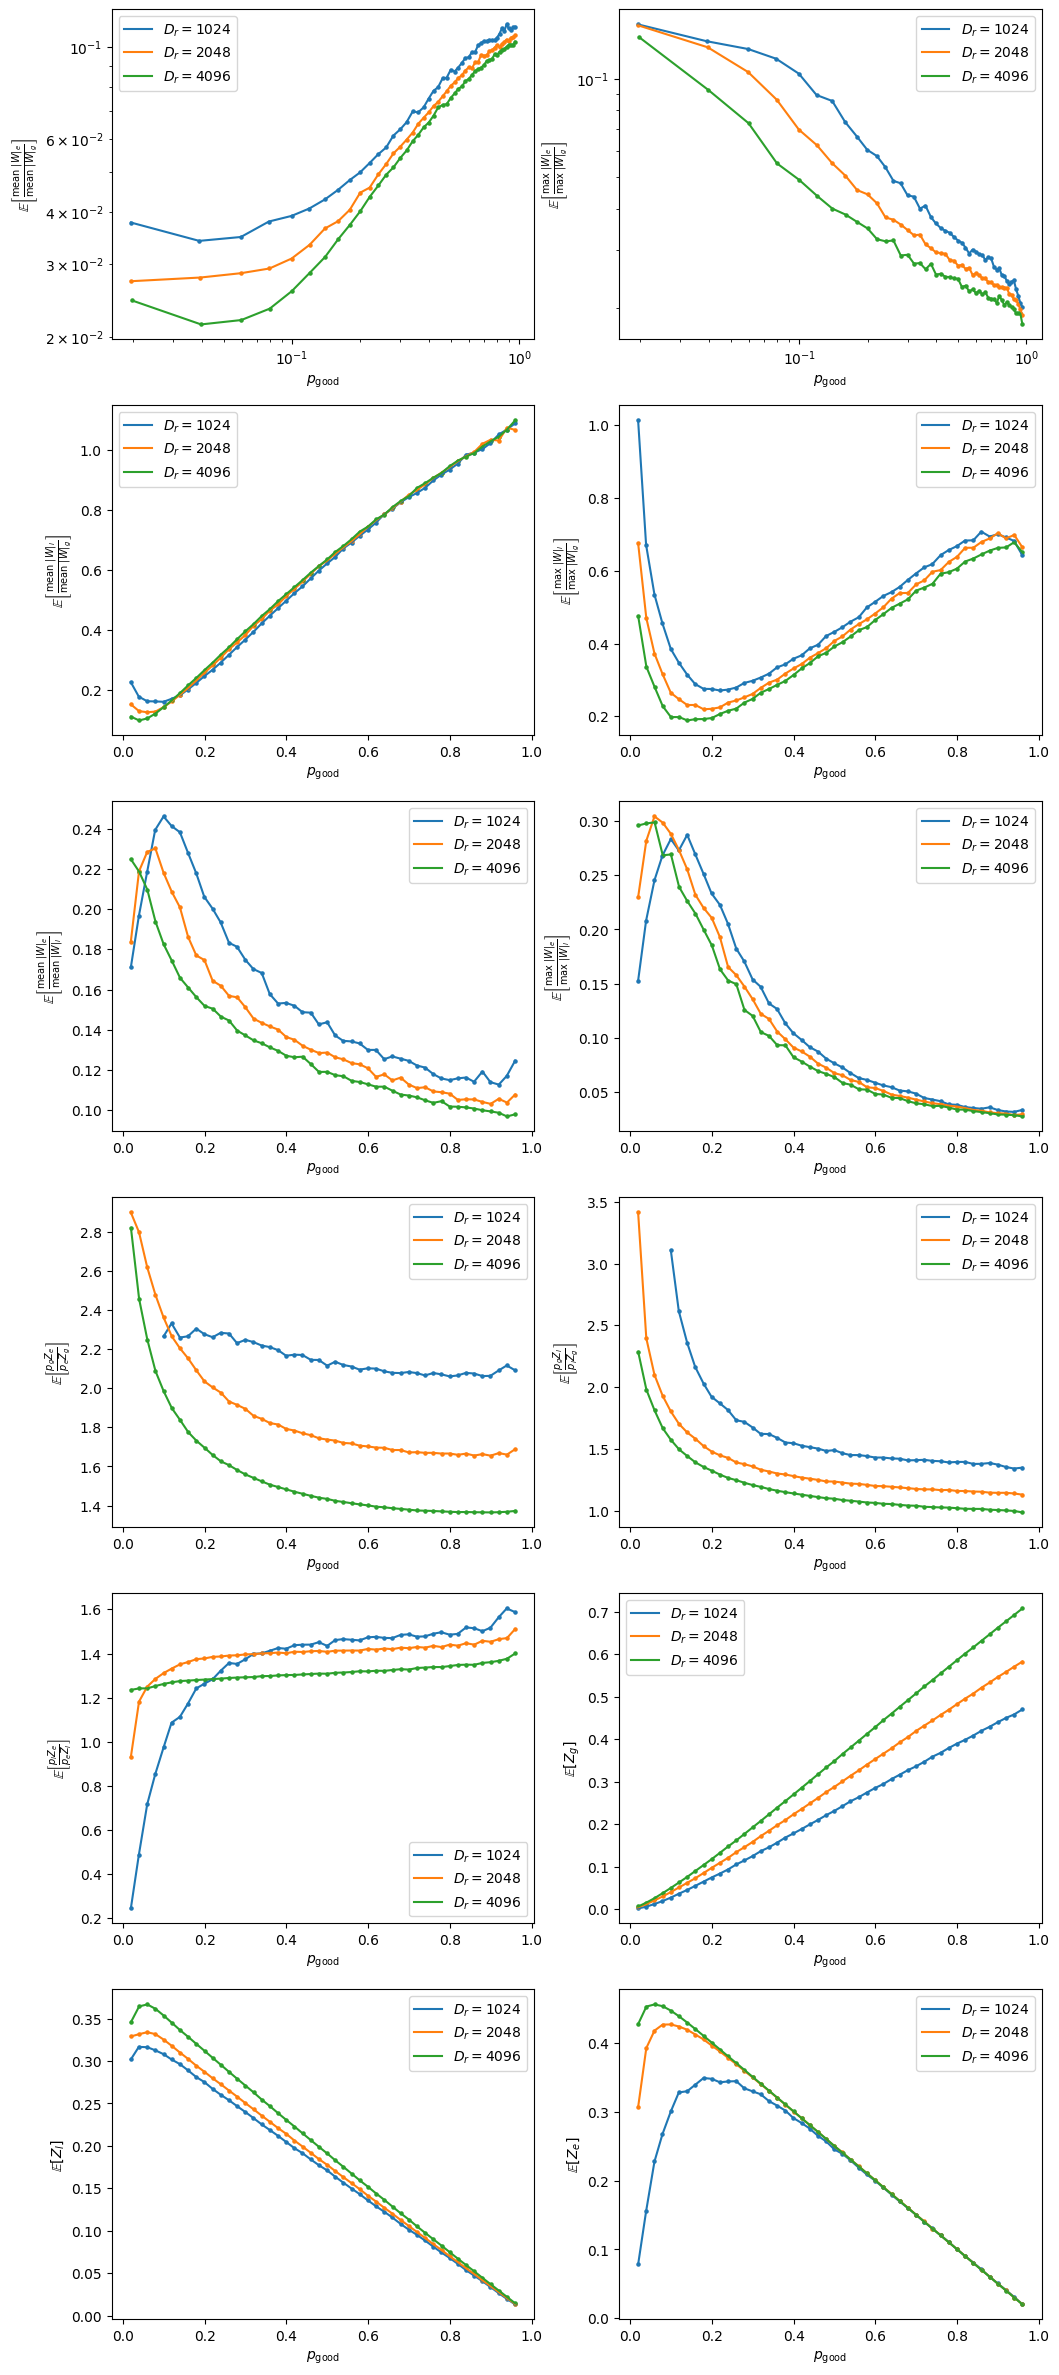

In [7]:
fig = plt.figure(figsize=(12, 30))
ax1 = fig.add_subplot(621)
ax2 = fig.add_subplot(622)
ax3 = fig.add_subplot(623)
ax4 = fig.add_subplot(624)
ax5 = fig.add_subplot(625)
ax6 = fig.add_subplot(626)
ax7 = fig.add_subplot(627)
ax8 = fig.add_subplot(628)
ax9 = fig.add_subplot(629)
ax10 = fig.add_subplot(6,2,10)
ax11 = fig.add_subplot(6,2,11)
ax12 = fig.add_subplot(6,2,12)


idx_1, idx_2 = 1, -2

for i, D_r in enumerate(all_D_r[-3:]):
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D_r))
    ratio = bsa.get_ratio_line('|W_e|_mean', '|W_g|_mean')[0]
    ax1.loglog(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], label=fr'$D_r=${D_r}')
    ax1.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], s=5)

    ratio = bsa.get_ratio_line('|W_e|_max', '|W_g|_max')[0]
    ax2.loglog(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], label=fr'$D_r=${D_r}')
    ax2.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], s=5)

    ratio = bsa.get_ratio_line('|W_l|_mean', '|W_g|_mean')[0]
    ax3.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], label=fr'$D_r=${D_r}')
    ax3.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], s=5)

    ratio = bsa.get_ratio_line('|W_l|_max', '|W_g|_max')[0]
    ax4.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], label=fr'$D_r=${D_r}')
    ax4.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], s=5)

    ratio = bsa.get_ratio_line('|W_e|_mean', '|W_l|_mean')[0]
    ax5.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], label=fr'$D_r=${D_r}')
    ax5.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], s=5)

    ratio = bsa.get_ratio_line('|W_e|_max', '|W_l|_max')[0]
    ax6.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], label=fr'$D_r=${D_r}')
    ax6.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], s=5)

    ratio = bsa.get_ratio_line('zc_extreme', 'zc_good')[0]
    w = bsa.percents[idx_1: idx_2] / ((1. - bsa.percents[idx_1: idx_2])/2)
    ax7.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2]*w, label=fr'$D_r=${D_r}')
    ax7.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2]*w, s=5)

    ratio = bsa.get_ratio_line('zc_linear', 'zc_good')[0]
    w = bsa.percents[idx_1: idx_2] / ((1. - bsa.percents[idx_1: idx_2])/2)
    ax8.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2]*w, label=fr'$D_r=${D_r}')
    ax8.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2]*w, s=5)

    ratio = bsa.get_ratio_line('zc_extreme', 'zc_linear')[0]
    w = 1.
    ax9.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2]*w, label=fr'$D_r=${D_r}')
    ax9.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2]*w, s=5)

    ratio = bsa.get_line('zc_good')[0]
    w = 1.
    ax10.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2]*w, label=fr'$D_r=${D_r}')
    ax10.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2]*w, s=5)

    ratio = bsa.get_line('zc_linear')[0]
    w = 1.
    ax11.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2]*w, label=fr'$D_r=${D_r}')
    ax11.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2]*w, s=5)

    ratio = bsa.get_line('zc_extreme')[0]
    w = 1.
    ax12.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2]*w, label=fr'$D_r=${D_r}')
    ax12.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2]*w, s=5)

ax1.set_xlabel(r'$p_{\rm good}$')
ax1.set_ylabel(r'$\mathbb{E}\left[\frac{\text{mean }{|W|_e}}{\text{mean }{|W|_g}}\right]$')
ax1.legend()

ax2.set_xlabel(r'$p_{\rm good}$')
ax2.set_ylabel(r'$\mathbb{E}\left[\frac{\text{max }{|W|_e}}{\text{max }{|W|_g}}\right]$')
ax2.legend()

ax3.set_xlabel(r'$p_{\rm good}$')
ax3.set_ylabel(r'$\mathbb{E}\left[\frac{\text{mean }{|W|_l}}{\text{mean }{|W|_g}}\right]$')
ax3.legend()

ax4.set_xlabel(r'$p_{\rm good}$')
ax4.set_ylabel(r'$\mathbb{E}\left[\frac{\text{max }{|W|_l}}{\text{max }{|W|_g}}\right]$')
ax4.legend()

ax5.set_xlabel(r'$p_{\rm good}$')
ax5.set_ylabel(r'$\mathbb{E}\left[\frac{\text{mean }{|W|_e}}{\text{mean }{|W|_l}}\right]$')
ax5.legend()

ax6.set_xlabel(r'$p_{\rm good}$')
ax6.set_ylabel(r'$\mathbb{E}\left[\frac{\text{max }{|W|_e}}{\text{max }{|W|_l}}\right]$')
ax6.legend()

ax7.set_xlabel(r'$p_{\rm good}$')
ax7.set_ylabel(r'$\mathbb{E}\left[\frac{p_gZ_e}{p_eZ_g}\right]$')
ax7.legend()

ax8.set_xlabel(r'$p_{\rm good}$')
ax8.set_ylabel(r'$\mathbb{E}\left[\frac{p_gZ_l}{p_lZ_g}\right]$')
ax8.legend()

ax9.set_xlabel(r'$p_{\rm good}$')
ax9.set_ylabel(r'$\mathbb{E}\left[\frac{p_lZ_e}{p_eZ_l}\right]$')
ax9.legend()

ax10.set_xlabel(r'$p_{\rm good}$')
ax10.set_ylabel(r'$\mathbb{E}\left[Z_g\right]$')
ax10.legend()

ax11.set_xlabel(r'$p_{\rm good}$')
ax11.set_ylabel(r'$\mathbb{E}\left[Z_l\right]$')
ax11.legend()

ax12.set_xlabel(r'$p_{\rm good}$')
ax12.set_ylabel(r'$\mathbb{E}\left[Z_e\right]$')
ax12.legend()

plt.savefig('../data/plots/finer_zero_cols.png')

**$D_{r_1}$ vs $D_{r_2}$**

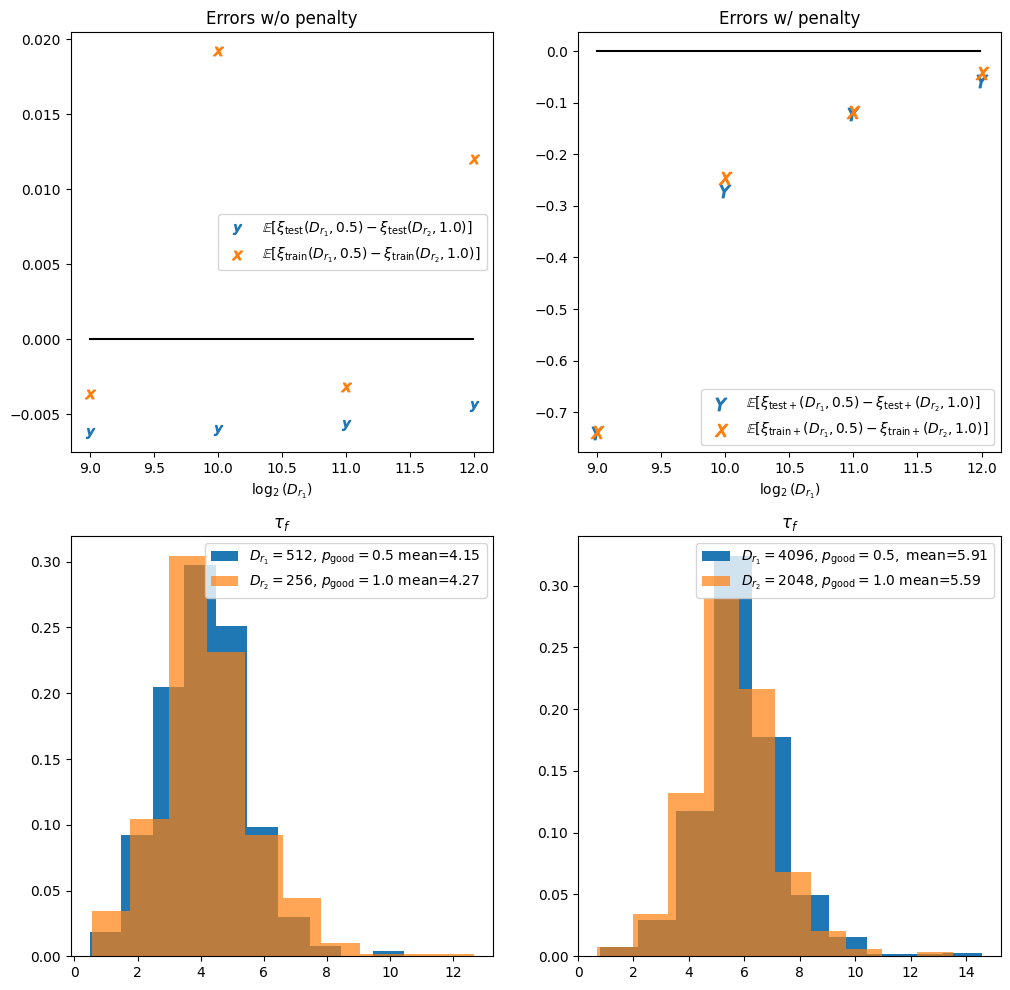

In [9]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ks = [9, 10, 11, 12]
dte = []
dtr = []
dtep = []
dtrp = []

for k in ks:
    D1 = int(2**k)
    D2 = int(2**(k-1))
    bsa1, bsa2 = sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D1)), sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D2))
    dte.append(bsa1.get_line('mean_sq_err')[0][25] - bsa2.get_line('mean_sq_err')[0][-1])
    dtr.append(bsa1.get_line('train_sq_err')[0][25] - bsa2.get_line('train_sq_err')[0][-1])
    dtep.append(bsa1.get_line('mean_sq_err_penalty')[0][25] - bsa2.get_line('mean_sq_err_penalty')[0][-1])
    dtrp.append(bsa1.get_line('train_sq_err_penalty')[0][25] - bsa2.get_line('train_sq_err_penalty')[0][-1])

 
ax1.scatter(ks, dte, s=50, marker=r'$y$', label=r'$\mathbb{E}[\xi_{\rm test}(D_{r_1}, 0.5)-\xi_{\rm test}(D_{r_2}, 1.0)]$')
ax1.scatter(ks, dtr, s=50, marker=r'$x$', label=r'$\mathbb{E}[\xi_{\rm train}(D_{r_1}, 0.5)-\xi_{\rm train}(D_{r_2}, 1.0)]$')
# ax1.scatter(ks, dtep, s=80, marker=r'$Y$', label=r'$\mathbb{E}[\xi_{\rm test+}(D_{r_1}, 1)-\xi_{\rm test+}(D_{r_2}, 0.5)]$')
# ax1.scatter(ks, dtrp, s=80, marker=r'$X$', label=r'$\mathbb{E}[\xi_{\rm test+}(D_{r_1}, 1)-\xi_{\rm test+}(D_{r_2}, 0.5)]$')
ax1.plot(np.arange(9, 12, 0.01), 0.*np.arange(9, 12, 0.01), c='black')
ax1.set_title('Errors w/o penalty')
ax1.set_xlabel(r'$\log_2(D_{r_1})$')
ax1.legend()


ax2.scatter(ks, dtep, s=80, marker=r'$Y$', label=r'$\mathbb{E}[\xi_{\rm test+}(D_{r_1}, 0.5)-\xi_{\rm test+}(D_{r_2}, 1.0)]$')
ax2.scatter(ks, dtrp, s=80, marker=r'$X$', label=r'$\mathbb{E}[\xi_{\rm train+}(D_{r_1}, 0.5)-\xi_{\rm train+}(D_{r_2}, 1.0)]$')
ax2.plot(np.arange(9, 12, 0.01), 0.*np.arange(9, 12, 0.01), c='black')
ax2.set_title('Errors w/ penalty')
ax2.set_xlabel(r'$\log_2(D_{r_1})$')
ax2.legend()


k = 9
D1 = int(2**k)
D2 = int(2**(k-1))
bsa1, bsa2 = sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D1)), sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D2))
data = bsa1.get_data()
data = data.loc[data['good_rows_W_in']==0.5]
ax3.hist(data['tau_f_se'], label=r'$D_{r_1}=$'+'{}, '.format(D1)+r'$p_{\rm good}=0.5$'+' mean={:.2f}'.format(data['tau_f_se'].mean()), density=True)
data = bsa2.get_data()
data = data.loc[data['good_rows_W_in']==bsa2.percents[-1]]
ax3.hist(data['tau_f_se'], label=r'$D_{r_2}=$'+'{}, '.format(D2)+r'$p_{\rm good}=1.0$'+' mean={:.2f}'.format(data['tau_f_se'].mean()), alpha=0.7, density=True)
ax3.set_title(r'$\tau_f$')
ax3.legend()

k = 12
D1 = int(2**k)
D2 = int(2**(k-1))
bsa1, bsa2 = sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D1)), sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D2))
data = bsa1.get_data()
data = data.loc[data['good_rows_W_in']==0.5]
ax4.hist(data['tau_f_se'], label=r'$D_{r_1}=$'+'{}, '.format(D1)+r'$p_{\rm good}=0.5,$'+' mean={:.2f}'.format(data['tau_f_se'].mean()), density=True)
data = bsa2.get_data()
data = data.loc[data['good_rows_W_in']==bsa2.percents[-1]]
ax4.hist(data['tau_f_se'], label=r'$D_{r_2}=$'+'{}, '.format(D2)+r'$p_{\rm good}=1.0$'+ ' mean={:.2f}'.format(data['tau_f_se'].mean()), alpha=0.7, density=True)
ax4.set_title(r'$\tau_f$')
ax4.legend()
plt.savefig('../data/plots/compare_D_r.png')

In [30]:
bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folder + '/512')
data = bsa.get_data()
data0 = data[data['good_rows_W_in']==0.]
data1 = data[data['good_rows_W_in']==bsa.percents[-1]]

In [31]:
t = data0['tau_f_se']
t.max(), t.min()

(6.2972, 0.273)

In [32]:
t = data1['tau_f_se']
t.max(), t.min()

(12.376, 0.637)

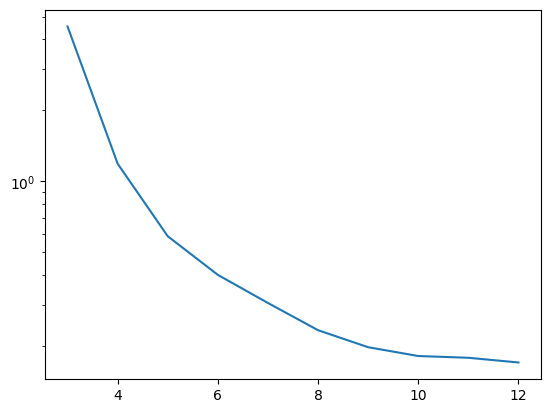

In [38]:
x = []
y = []
for n in range(3, 13):
    D_r = int(2**n)
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folder + '{}'.format(D_r))
    data = bsa.get_data()
    data = data[data['good_rows_W_in']==bsa.percents[-1]]
    arr = data['tau_f_se']
    x.append(n)
    y.append(arr.mean())
plt.semilogy(x, 1./np.array(y))